# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
## Importing necessary library 
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## read csv file using pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/module 4/Capstone project Bike Sharing Prediction Regression/SeoulBikeData2.csv')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# To check how many rows and columns
df.shape

(8760, 14)

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
## Cheking null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



*   No null values in the data 
*   Data type contain integer, float and objective 



## ***Data Preprcessing***

---



---



In [ ]:
## change date to perfect date format
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [ ]:
## Adding new month column with mont format
 
frame = pd.to_datetime(df['Date'], dayfirst = True)
frame = pd.DataFrame([frame]).transpose()
frame['Date']= frame
frame['month']= frame['Date'].dt.month
df['Month'] = frame['month']

In [ ]:
## converting date format to Weekdays like Sunday, Monday, tuesday, Wednsday, thursday, Friday and saturday 

df['WeekDay']=df["Date"].dt.day_name()

In [ ]:
## Drop entire Date column whilw modeling we don't need Dates 

df = df.drop(columns=['Date'])

In [ ]:
## unique values
df.apply(lambda x: len(x.unique()))

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Month                          12
WeekDay                         7
dtype: int64

In [ ]:
# Checking if any null values in every columns 

df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
WeekDay                      0
dtype: int64

There are no null values present in the rows


# **Exploratory Data Analysis**

---



---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

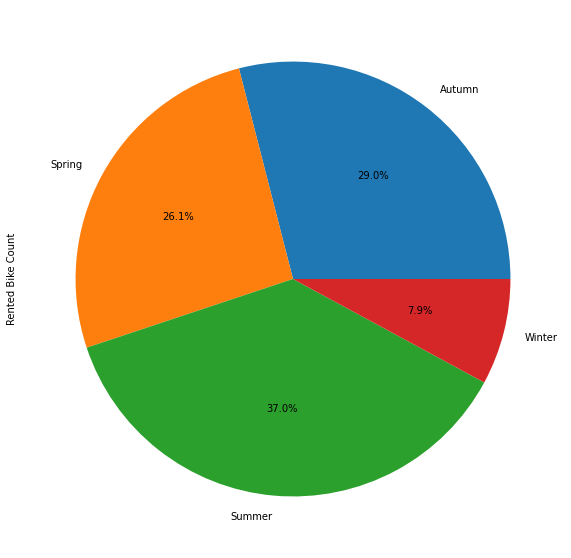

In [ ]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(figsize=(10,10),autopct='%1.1f%%')

From the above pie graph we can say that the largest number of bikes rented in Summer and Spring Seasons as well as Autumn season And In winter season rate of ranting bike is decreases.

The reason behind decreasing rate of ranting bike is that the temperature is below 0 in that situation evryone dont wants to go outside with bikes, might be they prefer travelling with there own cars or buses where temperature is maintain.


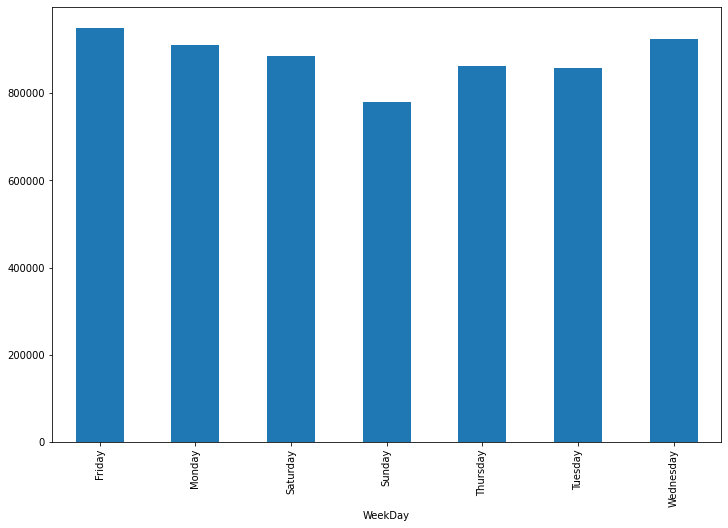

In [ ]:
## Bar plot of Weekdays with respect to Rented Bike Count
plt.subplots(figsize = (12,8))
df.groupby('WeekDay').sum()['Rented Bike Count'].plot.bar()

From the above graph we can't see any major difference renting bikes during weekdays.

But in sunday renting bike is lower than other days, it may happen because of holiday.

[Text(0.5, 1.0, 'Relation Between Humidity and users')]

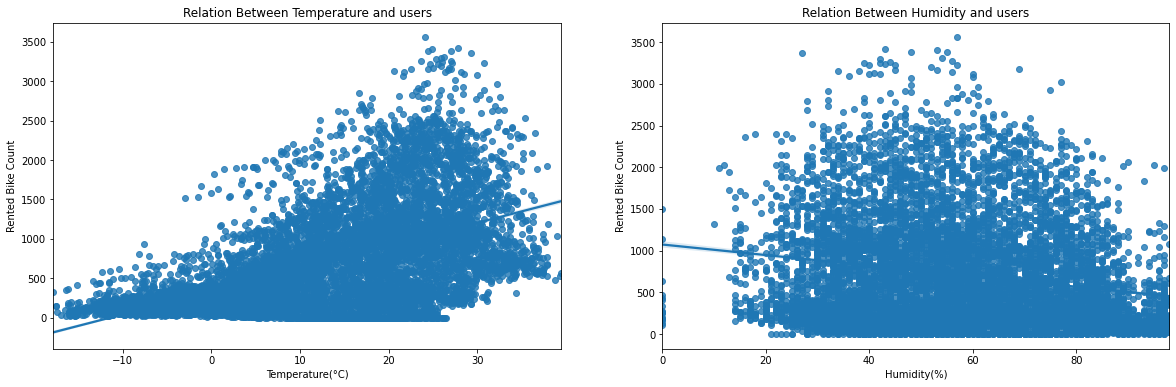

In [ ]:
## Scatter plot for looking relation between Temperature(°C) and Rented Bike Count
## Scatter plot for looking relation between Humidity(%) and Rented Bike Count

fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,6))
sns.regplot(x = df['Temperature(°C)'], y=df['Rented Bike Count'], ax=ax1)
ax1.set(title = 'Relation Between Temperature and users')
sns.regplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], ax=ax2)
ax2.set(title = 'Relation Between Humidity and users')

From the above first graph shows relation between Temperature(°C) and Rented Bike Count. Clearly It shows relation between Temperature(°C) and Rented Bike Count. When Temperature is increases, Rented Bike count is increases.

From the above second graph shows relation between Humidity(%)) and Rented Bike Count. We can't see any relation.

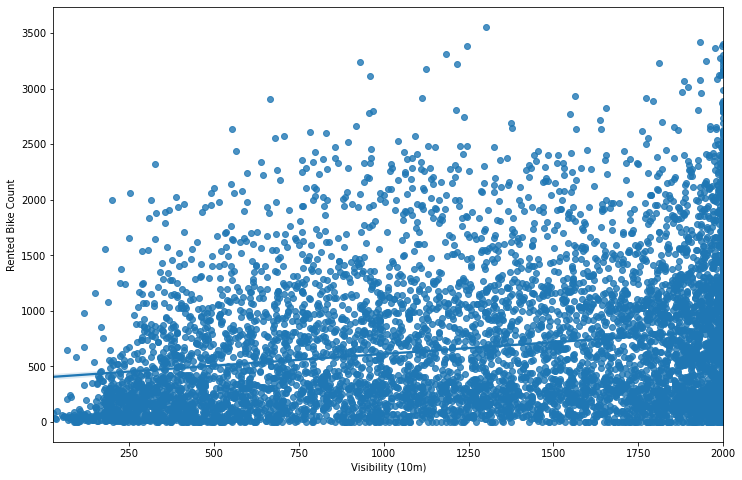

In [ ]:
## Scatter plot for looking relation between Visibility (10m) and Rented Bike Count 

fig, (ax1) = plt.subplots(figsize = (12,8))
sns.regplot(x = df['Visibility (10m)'], y=df['Rented Bike Count'], ax=ax1)

From the above graph we can not see any relation between Visibility (10m) and Rented Bike Count 

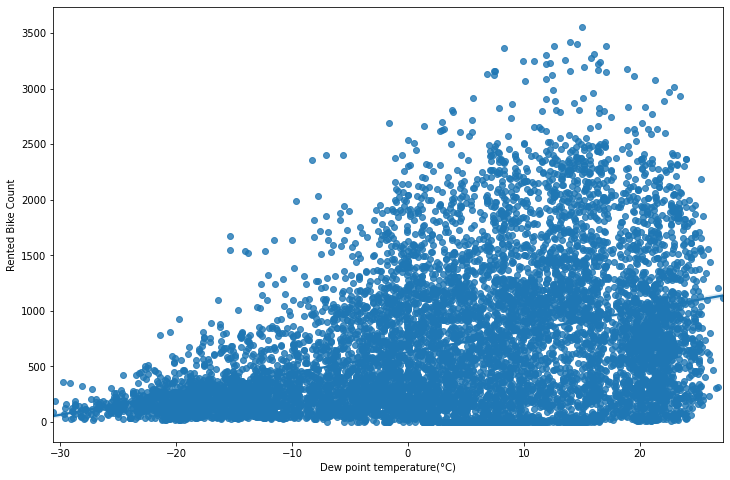

In [ ]:
## Scater plot between Dew point temperature(°C) and Rented Bike Count.

fig, (ax1) = plt.subplots(figsize = (12,8))
sns.regplot(x = df['Dew point temperature(°C)'], y=df['Rented Bike Count'], ax=ax1)


From the above graph we can see the relation. the relation is same as relation between temperature and rented bike count

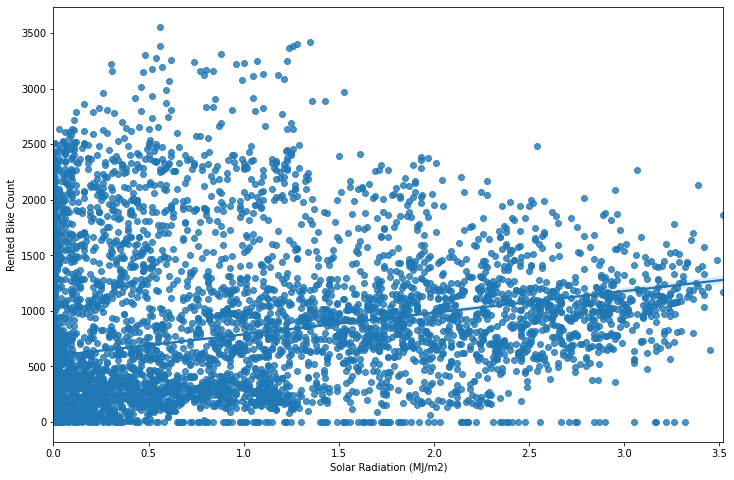

In [ ]:
## Scatter plot between Solar Radiation (MJ/m2) and Rented Bike Count

fig, (ax1) = plt.subplots(figsize = (12,8))
sns.regplot(x = df['Solar Radiation (MJ/m2)'], y=df['Rented Bike Count'], ax=ax1)


From the above graph we can not see relation.

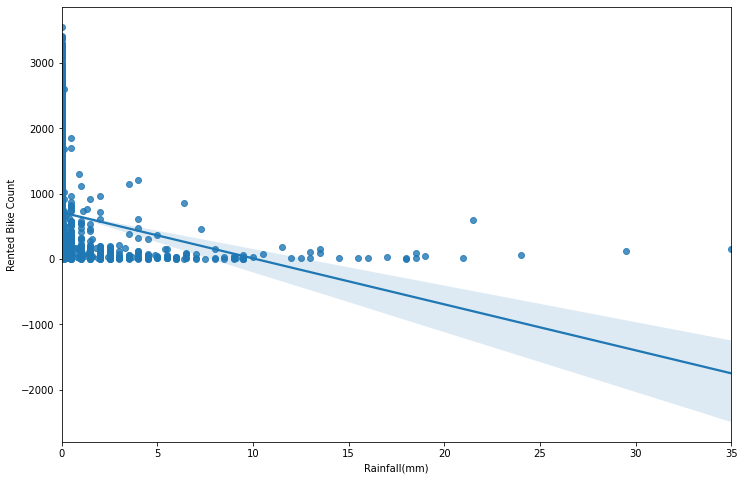

In [ ]:
## Scatter plot between Rainfall(mm) and Rented Bike Count

fig, (ax1) = plt.subplots(figsize = (12,8))
sns.regplot(x = df['Rainfall(mm)'], y=df['Rented Bike Count'], ax=ax1)


If no rainfall the rented bike count is highest.. 

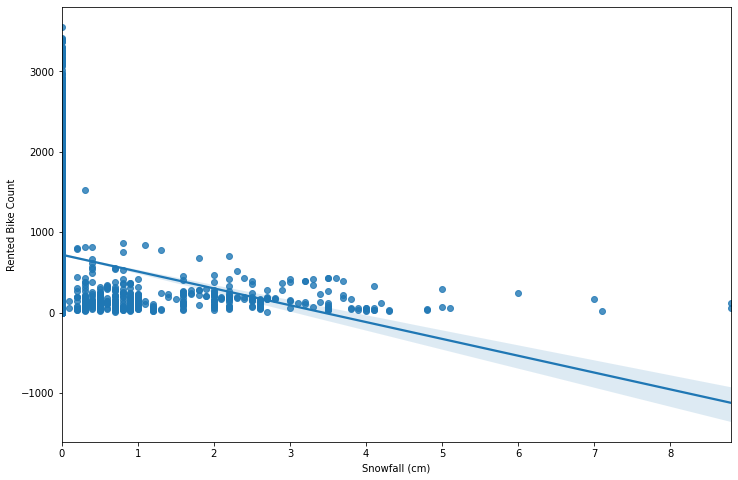

In [ ]:
## Scatter plot between Snowfall (cm) and Rented Bike Count..

fig, (ax1) = plt.subplots(figsize = (12,8))
sns.regplot(x = df['Snowfall (cm)'], y=df['Rented Bike Count'], ax=ax1)


If there is no snowfall the rented bike count is highest

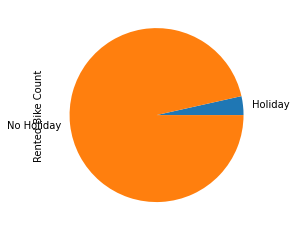

In [ ]:
### Pie plot between Holiday and Rented Bike Count

df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie()


The rented bike count is highest when no holiday. 

from the above we can say the bike is rented by working people. 

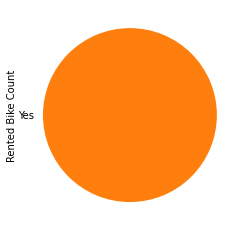

In [ ]:
## Pie Plot between Functioning Day and Rented Bike Count
df.groupby('Functioning Day').sum()['Rented Bike Count'].plot.pie()

All day is functioning day.

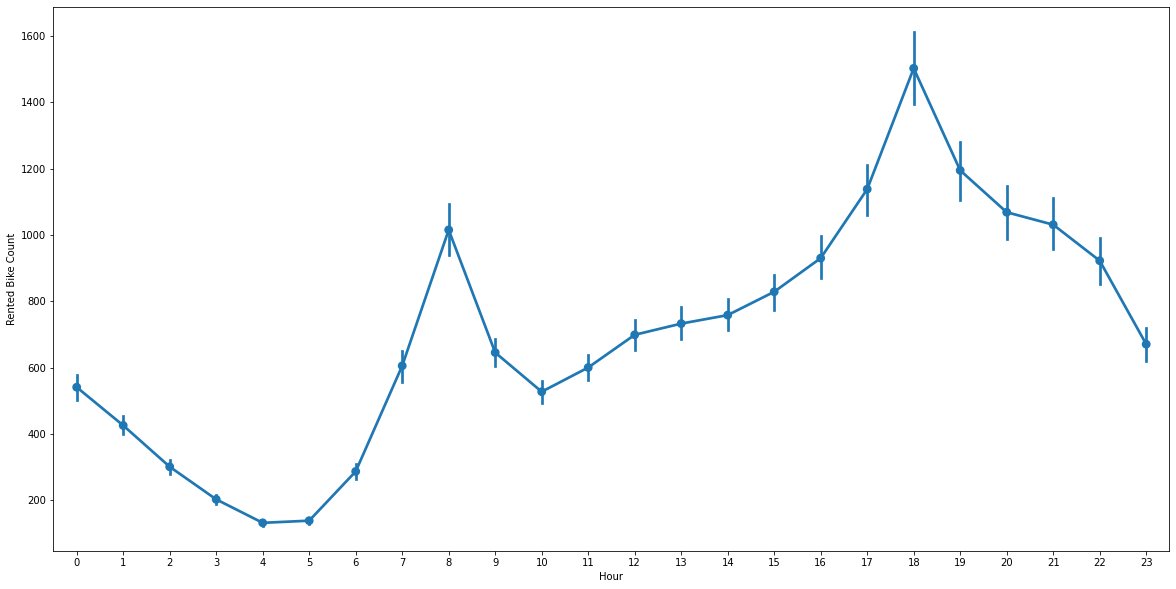

In [ ]:
## Point plot between Hour and Rented Bike Count

fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = df, x = 'Hour', y = 'Rented Bike Count', ax = ax)

From above graph we can say that.

Bike sharing starts from the morning at 6 am it is getting traction till 8 am, slowly its slowing down to 10am. we can consider that some many people go to office and another place in the morning thats why its getting peak from 6 am to 10 am.

Again in the evening from 4 pm to 8 pm getting traction. From that we can consider people coming back to home. After that bike renting go down till the night time. 

[Text(0.5, 1.0, 'Rented Bike Count during weekdays')]

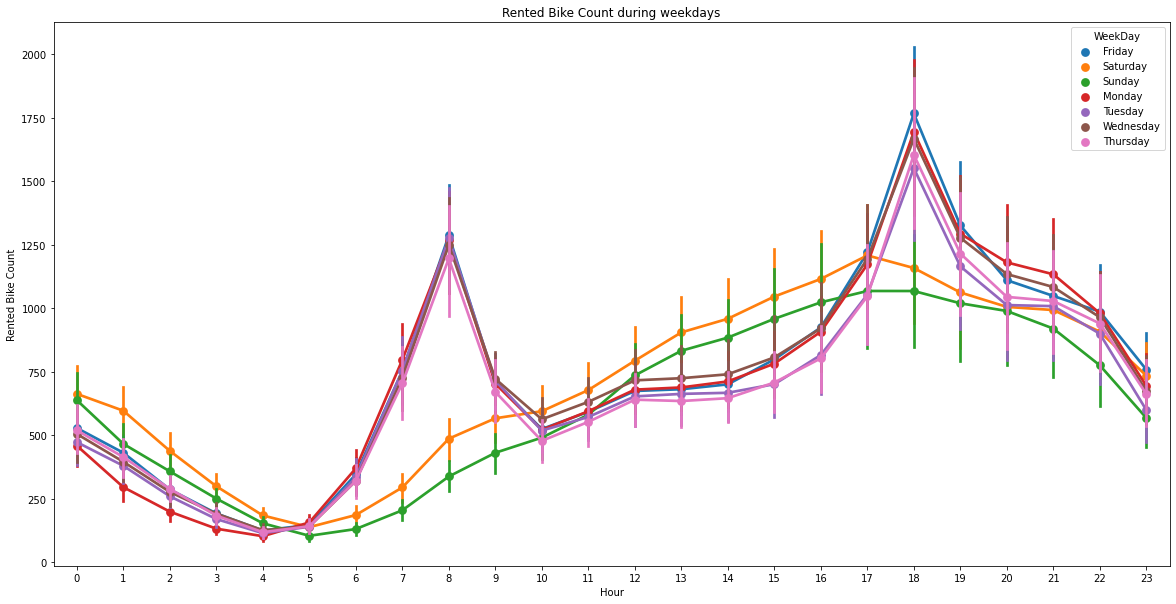

In [ ]:
## Point plot between Hour and Rented Bike Count during weekdays

fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = df, x = 'Hour', y = 'Rented Bike Count', hue='WeekDay' ,ax = ax)
ax.set(title = 'Rented Bike Count during weekdays')

From the above graph we can say that bike count in monday, Tuesday, Wednseday, Thursday, Friday is same as previous graph 

But in Saturday and Sunday graph shows differnt pattern it ois different from another days. From 10 am to 9 pm getting traction. People go out for vaccations and some other purpose. In the weekends getting so many users in the afternoon and evening time.

[Text(0.5, 1.0, 'Rented Bike Count during different Seasons')]

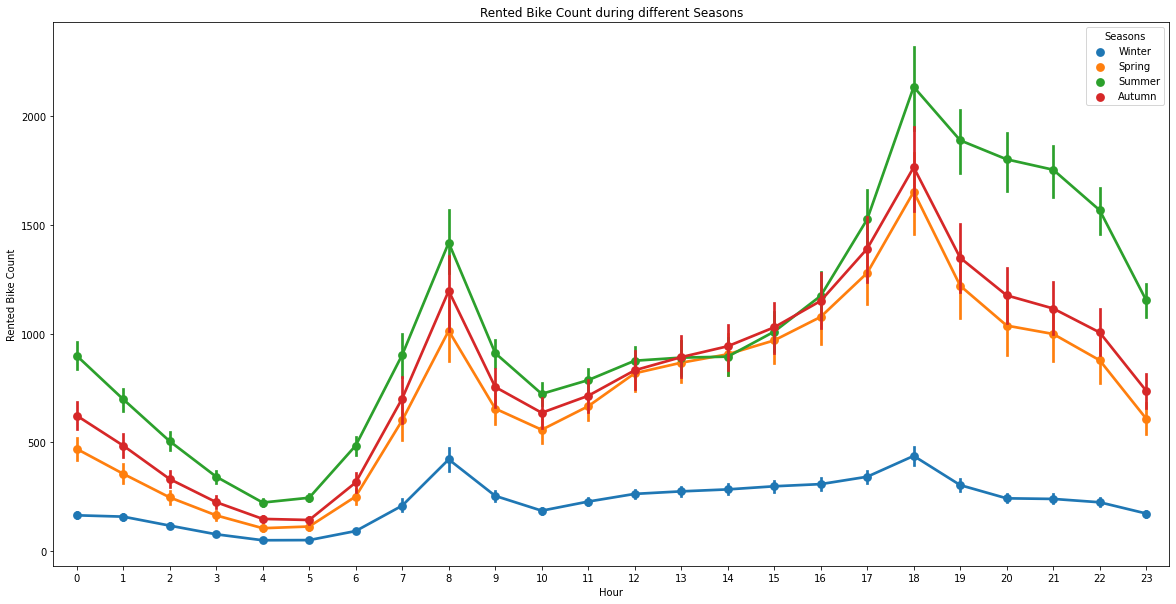

In [ ]:
## Point plot between Hour and Rented Bike Count during Seasons

fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = df, x = 'Hour', y = 'Rented Bike Count', hue='Seasons' ,ax = ax)
ax.set(title = 'Rented Bike Count during different Seasons')

From above graph the renting bike in a spring,autumn and summer season is hightest.

But In winter season the rate of renting bike is decreases, the reason behind that the temperature is very low because of people don't wants to renting bike and the may prefer travelling with vehicle where temperature maintained.

[Text(0.5, 1.0, 'Rented Bike Count in Month')]

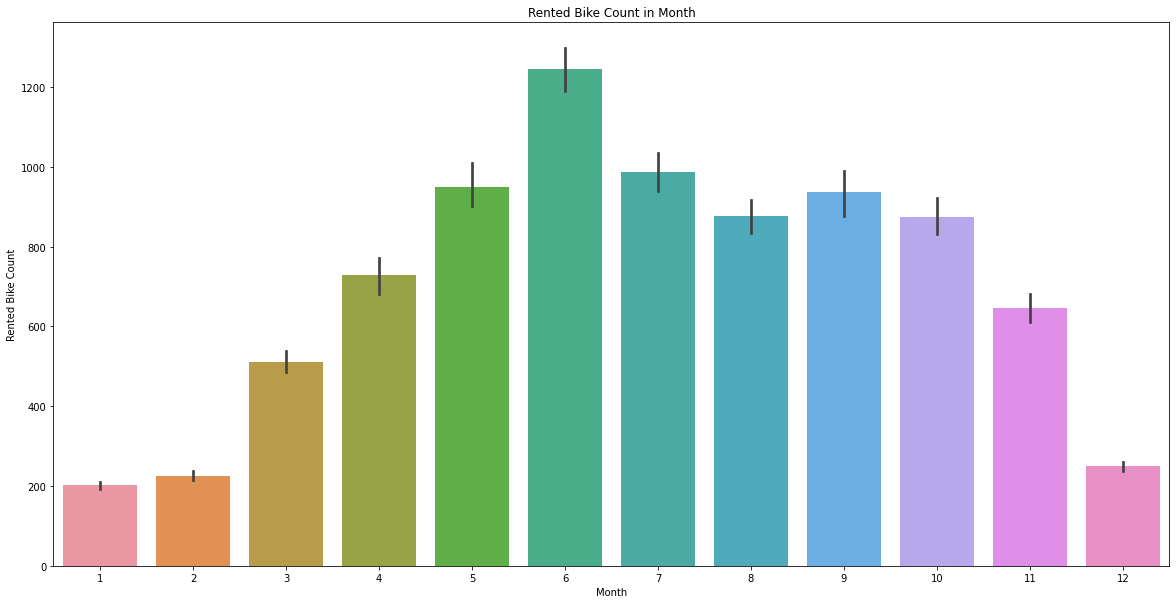

In [ ]:
## Bar plot between Months and Rented Bike Count.

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data = df, x = 'Month', y = 'Rented Bike Count', ax = ax)
ax.set(title = 'Rented Bike Count in Month')

The above graph shows uniform distribution, The seasons are defined as spring (March, April, May), summer (June, July, August), autumn (September, October, November) and winter (December, January, February).

The rate of renting bike is increases from march month which is under spring season, highest peak of renting bikes in june month which is under summer season, after that renting bike rate is decreases from december to february which is under winter season.
  

# **Data Preparation**

---



---



In [ ]:
## Making duplicate data with using copy, we don't want to any changes in original data

df_pre = df.copy()

df_pre.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,WeekDay
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday


In [ ]:
## One hot code

df_pre = pd.get_dummies(df_pre, columns=["Seasons", "WeekDay"], prefix=["seasons", "weekday"])

In [ ]:
## Adding new column name "holiday" with binary values.
df_pre['holiday'] = df_pre['Holiday'].apply(lambda x : 0 if x == 'No Holiday' else 1)

## Adding new column name "functioning_day" with binary values.
df_pre['functioning_day'] = df_pre['Functioning Day'] .apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
## deleting "Holiday" and "Functioning Day" column because we don't need this data while modeling.
df_pre = df_pre.drop(columns=['Holiday', "Functioning Day"])

In [ ]:
df_pre.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,holiday,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
## Deleting Null values if iny present in data
df_pre.dropna(inplace=False)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,holiday,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,1,0,0,0,1,0,0,0,0,0,0,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,1,0,0,0,1,0,0,0,0,0,0,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,1,0,0,0,1,0,0,0,0,0,0,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,1,0,0,0,1,0,0,0,0,0,0,0,1


# **Model Training**

---



--

In [ ]:
## Training and spliting the data training data is 80% of the data and 20% data is for testing.

from sklearn.model_selection import train_test_split 
X = df_pre.drop(columns=["Rented Bike Count", "Humidity(%)", "Wind speed (m/s)", 
                         "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)"])

Y = df_pre['Rented Bike Count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 51)
print(X_train.shape)
print(X_test.shape)

(7008, 18)
(1752, 18)


**LinearRegression**

In [ ]:
## importing LinearRegression and ridge from sklearn
from sklearn.linear_model import LinearRegression, Ridge
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
## finding score or predicting values and compairing in percentage 
reg.score(X_test, Y_test) * 100

51.574326323662156

The score is very less we will not use this regression

**r2 Score**

In [ ]:
## importing r2 score from sklearn.matricd
from sklearn.metrics import r2_score
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)
r2_score(Y_train, y_pred_train) * 100

51.280422459088214

The score is very less we will not use this regression

In [ ]:
 ridge = Ridge(alpha = 10)
 ridge.fit(X_train, Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
## finding score or predicting values and compairing in percentage 
ridge.score(X_test, Y_test) * 100

51.54148632845108

The score is very less we will not use this regression

**Lasso Regression**

In [ ]:
## importing Lasso and LassoCV from sklearn.linearmodel
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso()
lasso.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
## finding score or predicting values and compairing in percentage 
lasso.score(X_test, Y_test) *100

51.51138574850129

The score is very less we will not use this regression

In [ ]:
lassocv = LassoCV()
lassocv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
## finding score or predicting values and compairing in percentage 
lassocv.score(X_test, Y_test) *100

50.89539122225393

The score is very less we will not use this regression

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
## finding score or predicting values and compairing in percentage 
r2_score(Y_test, y_pred) * 100

51.574326323662156

The score is very less we will not use this regression

**ElasticNet Regression**

In [ ]:
## Import ElasticNet from sklearn linearmodel
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
## Fitting training data in ElasticNet Model
elasticnet.fit(X_train, Y_train)

## finding score or predicting values and compairing in percentage 
elasticnet.score(X_test, Y_test) *100

48.555475257066725

The score is very less we will not use this regression

**KNeighborsRegressor**

---



---



In [ ]:
## Import K nearest neighbor regressor from sklearn neighbors
from sklearn.neighbors import KNeighborsRegressor
 
## Fitting training data in KNeighborsRegressor Model
Knn_regressor = KNeighborsRegressor(n_neighbors=5)
Knn_regressor.fit(X_train, Y_train)

## finding score or predicting values and compairing in percentage 
Knn_regressor.score(X_test, Y_test) *100

78.17480368717095

The Score is under good condition we can use this alogorithm, 
but we can use another algorithm if any increasing in accuracy. 

**DecisionTreeRegressor**

---



---



In [ ]:
## Import DecisionTreeRegressor from sklearn tree
from sklearn.tree import DecisionTreeRegressor

## Fiting training data in DecisionTreeRegressor
dc_regressor = DecisionTreeRegressor(criterion='mse')
dc_regressor.fit(X_train, Y_train)

## finding score or predicting values and compairing in percentage
dc_regressor.score(X_test, Y_test) * 100

78.46892665420197

we can see the above score the score is improved so we can use this algorithm for deploying

but we use another algorithm to see if any improvement in another model

**RandomForestRegressor**

---



---



---



In [ ]:
## Import Random Forest Regressor from sklearn ensemble
from sklearn.ensemble import RandomForestRegressor
Rand_regressor = RandomForestRegressor(n_estimators=105, criterion='mse')

## Fiting training data in RandomForestRegressor model
Rand_regressor.fit(X_train, Y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=105, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
## finding score or predicting values and compairing in percentage
Rand_regressor.score(X_test, Y_test)*100

88.27463896079219

we can see the above score, the score is improved so we can use this algorithm for deploying 